## <font color='orange'>Decision Trees<font>

Decision trees split the data into subcategories
which we use to predict some output variable.

Decision trees are easy to interpret and
visualize.

They can easily capture non-linear patterns.

They require fewer data preprocessing from the
user, for example, there is no need to normalize
columns.

### <font color='black'>Decision Tree Classification<font>

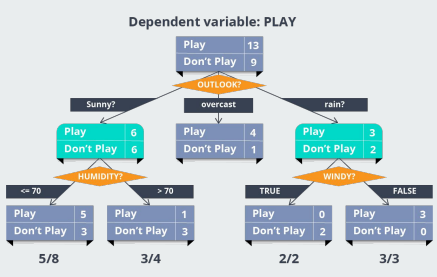

### <font color='black'>Decision Tree Regression<font>

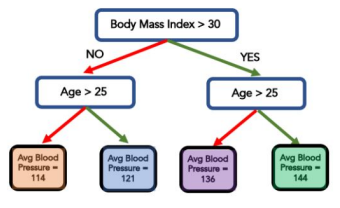

### <font color='black'>Evaluation metrics<font>

#### <font color='black'>Entropy<font>

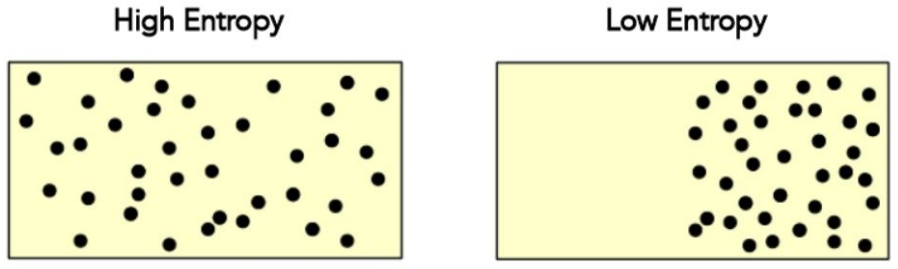

#### <font color='black'>Gini Index<font>

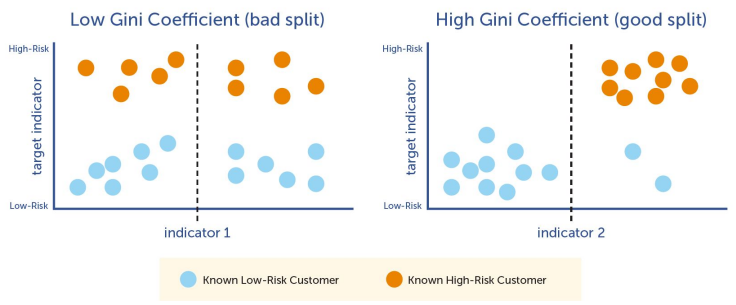

#### <font color='black'>Stop Condition<font>

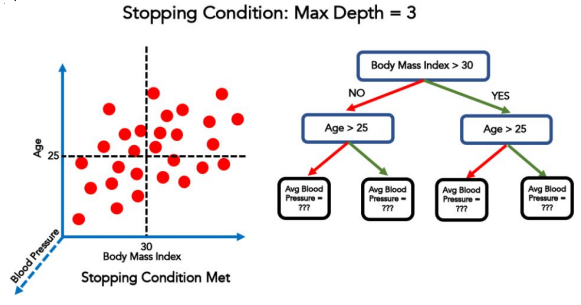

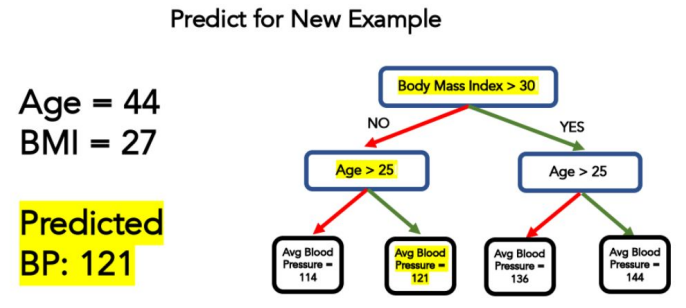

### <font color='red'>Coding Example<font>

#### <font color='black'>Classification<font>

In [1]:
!gdown 1eheisonKu8xCOSuqXu34elnt6rTOhXh5

/Users/ana/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1eheisonKu8xCOSuqXu34elnt6rTOhXh5
To: /Users/ana/Downloads/i2ds/bill_authentication.csv
100%|██████████████████████████████████████| 46.4k/46.4k [00:00<00:00, 55.5MB/s]


In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('bill_authentication.csv')

In [3]:
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


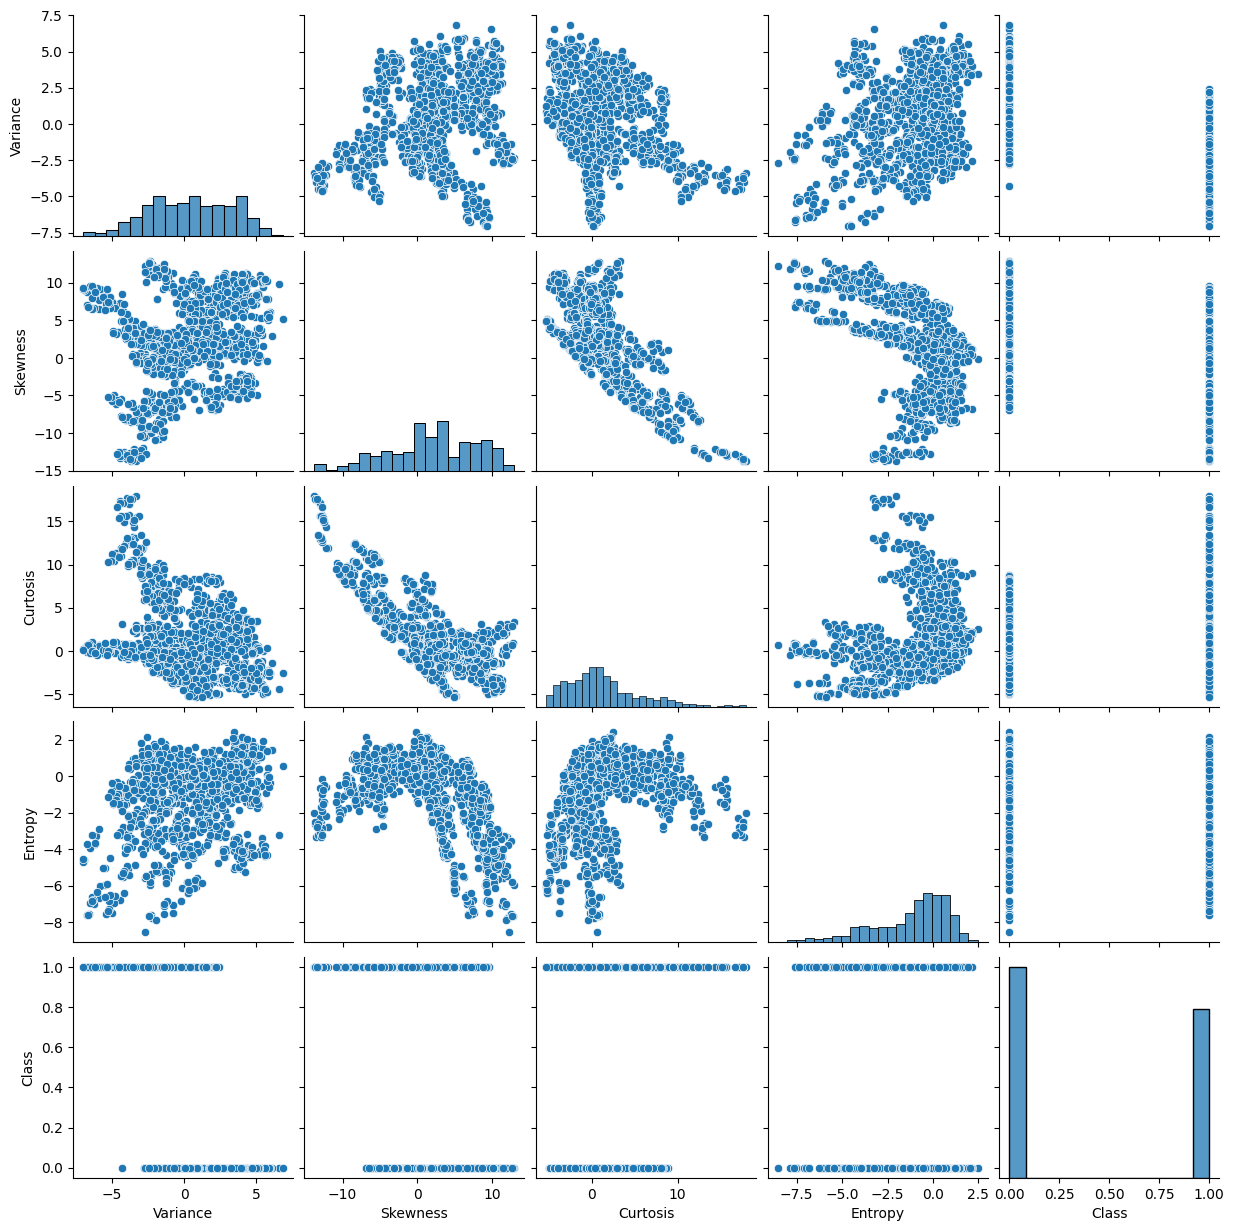

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['Class'], test_size=0.2)

In [6]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=3)
classifier = classifier.fit(X_train,Y_train)

y_pred = classifier.predict(X_test)

In [7]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9418181818181818


In [8]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[150   7]
 [  9 109]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       157
           1       0.94      0.92      0.93       118

    accuracy                           0.94       275
   macro avg       0.94      0.94      0.94       275
weighted avg       0.94      0.94      0.94       275



In [9]:
#Note: We can optimize the performance using the entropy as criteria.

classifier_opt = DecisionTreeClassifier(criterion="entropy", max_depth=3)

classifier_opt = classifier_opt.fit(X_train,Y_train)
y_pred = classifier_opt.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9418181818181818


#### <font color='black'>Regression<font>

In [10]:
!gdown 1z611SxFGAJaIKH4nAqKhFy2uKNNZw6tn
!gdown 1cNz31tLmAb_eSOOqcNQiAoMAmfQQfkAe

/Users/ana/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1z611SxFGAJaIKH4nAqKhFy2uKNNZw6tn
To: /Users/ana/Downloads/i2ds/50_Startups.csv
100%|██████████████████████████████████████| 2.44k/2.44k [00:00<00:00, 3.73MB/s]
/Users/ana/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cNz31tLmAb_eSOOqcNQiAoMAmfQQfkAe
To: /Users/ana/Downloads/i2ds/Position_Salaries.csv
100%|███████████████████████████████████████████| 246/246 [00:00<00:00, 430kB/s]


In [11]:
pos_salaries = pd.read_csv('Position_Salaries.csv')

In [12]:
pos_salaries.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


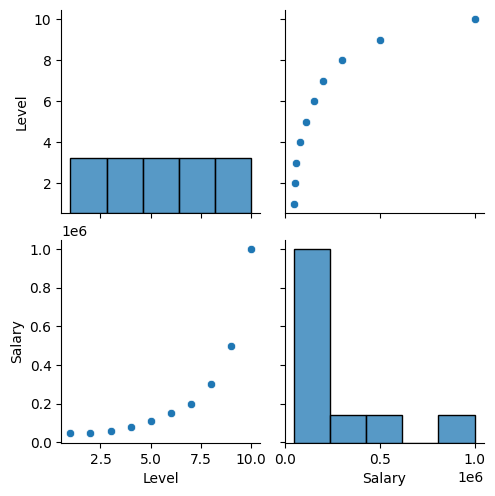

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(pos_salaries)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(pos_salaries[pos_salaries.columns[1:-1]],  pos_salaries['Salary'], test_size=0.2)

In [15]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

y_pred = regressor.predict(X_test)

In [16]:
print("Accuracy:",regressor.score(X_test, Y_test))

Accuracy: 0.5702479338842975


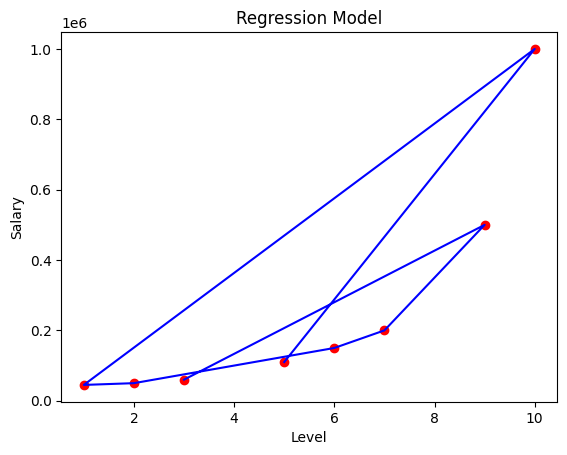

In [17]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Regression Model')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

/var/folders/nx/kqs1xpmd6k92tmch4lvb_gjm0000gn/T/ipykernel_25388/3862927947.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_train.values), max(X_train.values), 0.01)
/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


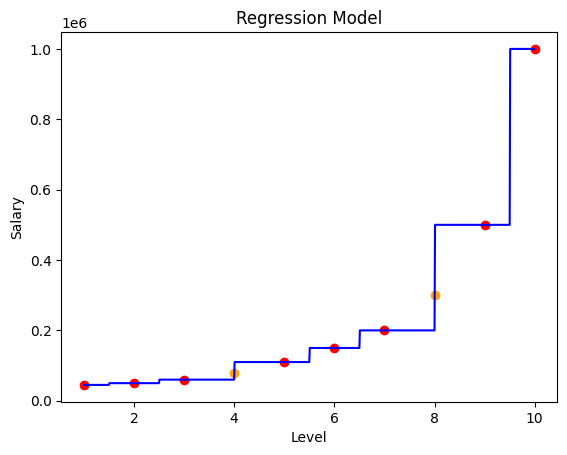

In [18]:
#Note: We can use another visualization.

X_grid = np.arange(min(X_train.values), max(X_train.values), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, Y_train, color = 'red')
plt.scatter(X_test, Y_test, color = 'orange')

plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')

plt.title('Regression Model')
plt.xlabel('Level')
plt.ylabel('Salary')

plt.show()

In [19]:
startups = pd.read_csv('50_Startups.csv')

In [20]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [21]:
#Note: We can only visualize up to 3 dimensions.

startups = startups.drop(columns=['State','Administration'])

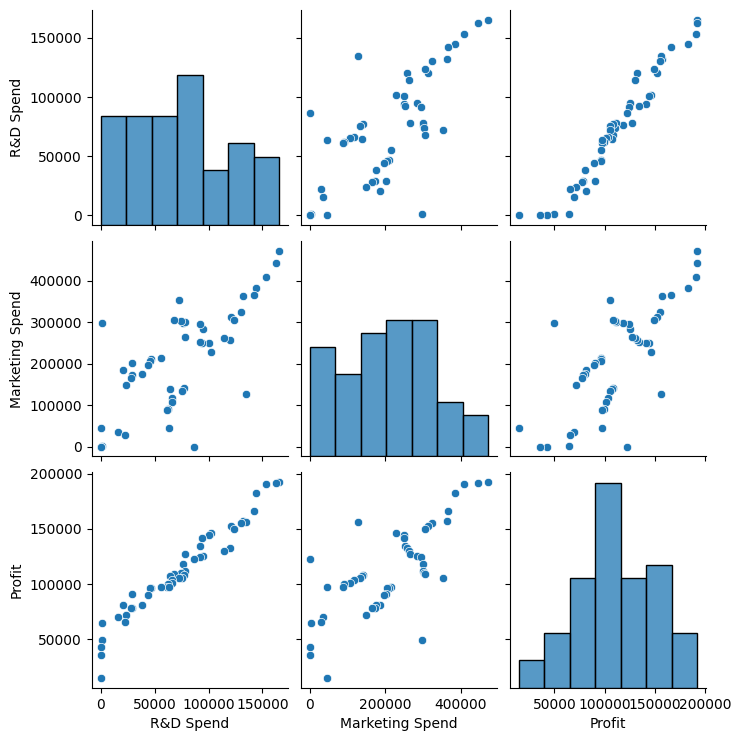

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(startups)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(startups[startups.columns[:-1]],  startups['Profit'], test_size=0.2)

In [24]:
from sklearn.tree import DecisionTreeRegressor

regressor2 = DecisionTreeRegressor()
regressor2.fit(X_train, Y_train)

y_pred2 = regressor2.predict(X_test)

In [25]:
print("Accuracy:",regressor2.score(X_test, Y_test))

Accuracy: 0.9269707901828033


/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


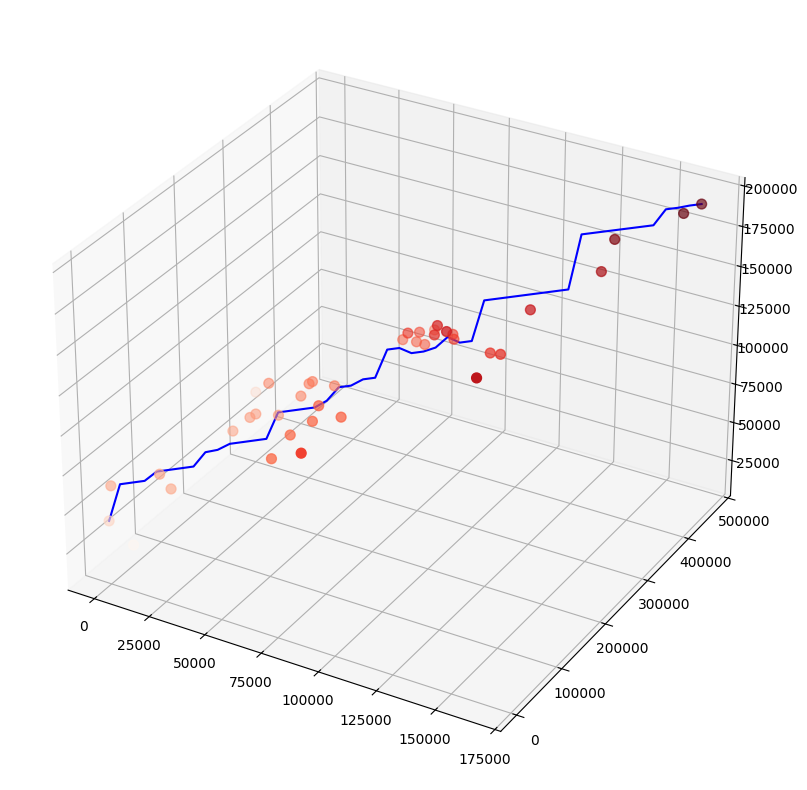

In [26]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')

zdata = Y_train
xdata = X_train.iloc[:, 0]
ydata = X_train.iloc[:, 1]

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds', s=50);

xline = np.linspace(min(xdata), max(xdata), 50)
yline = np.linspace(min(ydata), max(ydata), 50)

z = np.concatenate((xline.reshape(-1,1),yline.reshape(-1,1)), axis = 1)
zline = regressor2.predict(z)

ax.plot3D(xline, yline, zline, 'blue')

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1,
)


rf.fit(X_train, Y_train)
preds = rf.predict(X_test)

r2 = r2_score(Y_test, preds)
mae = mean_absolute_error(Y_test, preds)
rmse = mean_squared_error(Y_test, preds)

print(f"R²:   {r2:.4f}")
print(f"MAE:  {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")

R²:   0.9380
MAE:  9,012.64
RMSE: 116,940,176.44


## <font color='pink'>Boosting<font>

Boosting is an ensemble method, a way of combining predictions from several models into one. It does that by taking each predictor sequentially and modelling it based on its predecessor’s error (giving more weight to predictors that perform better):
1. Fit a first model using the original data
2. Fit a second model using the residuals of the first model
3. Create a third model using the sum of models 1 and 2

### <font color='white'>XGBoost<font>

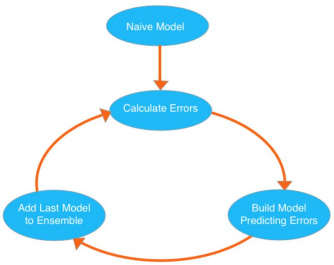

XGBoost is an extreme gradient boosting algorithm.
It is a supervised learning algorithm that can be used for regression or classification tasks.

XGBoost performs quite well for structured, tabular data. For non-structued data, neural networks are usually a better choice.

Gradient boosting is a specific type of boosting, named like this because it minimises the loss function using a gradient descent algorithm.

Gradient descent is an iterative first-order optimisation algorithm used to find a local minimum/maximum of a given function. This method is commonly used in machine learning and deep learning to minimise a cost/loss function.

XGBoost splits up to the specified max_depth and then starts pruning the tree backwards. XGBoost is comparatively faster than other ensemble classifiers. The core algorithm can be parallelized.
XGBoost can not handle categorical features, it only accepts numerical values.


#### <font color='red'>Coding Example<font>

##### <font color='black'>Classification<font>

In [29]:
!gdown 1Ua8MF62uBDnJJ1V3Y1i72tlQ0OioHK-j

/Users/ana/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Ua8MF62uBDnJJ1V3Y1i72tlQ0OioHK-j
To: /Users/ana/Downloads/i2ds/bill_authentication.csv
100%|██████████████████████████████████████| 46.4k/46.4k [00:00<00:00, 1.69MB/s]


In [30]:
import pandas as pd
import numpy as np

data = pd.read_csv('bill_authentication.csv')
data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


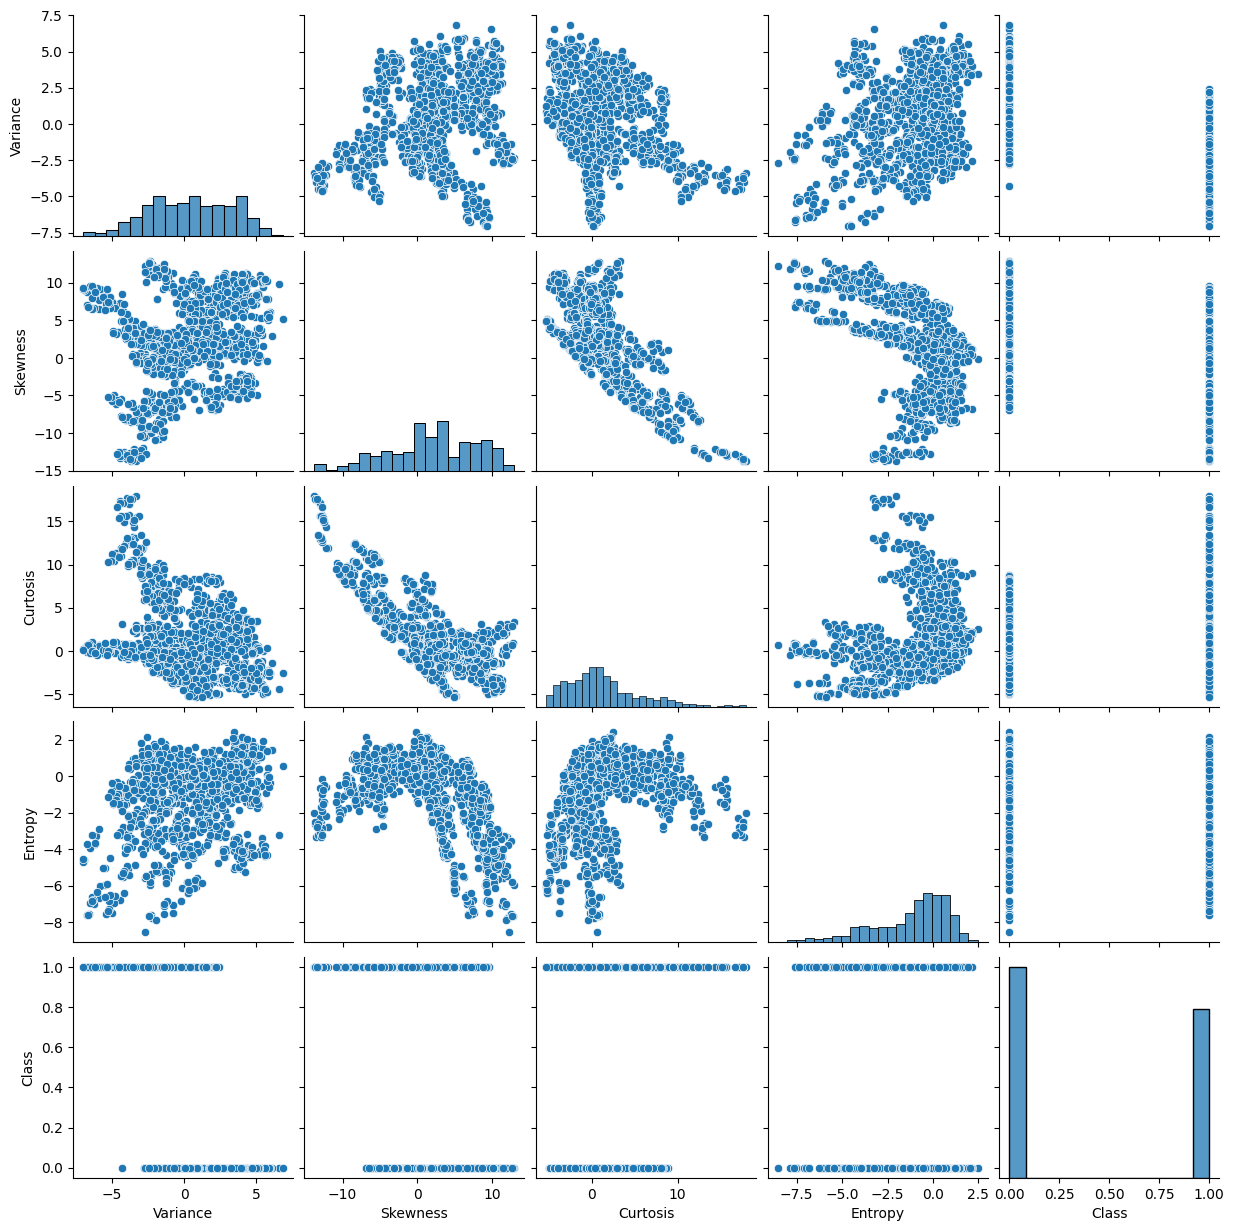

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['Class'], test_size=0.2)

In [33]:
#Note: max_depth is the maximum tree depth
#Note: min_child_weight represents a threshold that stops the splitting once the sample size in a node reaches it
#Note: n_estimators is the number of runs
#Note: n_jobs is the number of threads running in parallel
#Note: verbose is set to print evaluation scores in the appropriate steps
#Note: learning_rate is the learning speed

from xgboost import XGBClassifier

model = XGBClassifier(max_depth=50, min_child_weight=1, n_estimators=200, n_jobs=-1, verbose=1, learning_rate=0.16)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

/Users/ana/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:46:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


In [34]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9927272727272727


In [35]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[155   1]
 [  1 118]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       156
           1       0.99      0.99      0.99       119

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



##### <font color='black'>Regression<font>

In [36]:
!gdown 1oNcb8M_0w_h2AOe7xiuw_mDZkAU6SF9H

/Users/ana/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1oNcb8M_0w_h2AOe7xiuw_mDZkAU6SF9H
To: /Users/ana/Downloads/i2ds/train.csv
100%|████████████████████████████████████████| 461k/461k [00:00<00:00, 4.99MB/s]


In [37]:
data = pd.read_csv('train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [38]:
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

In [40]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [41]:
#Note: colsample_bytree is subsample ratio of columns when constructing each tree
#Note: alpha can help reduce model complexity and enhance performance

from xgboost import XGBRegressor

model = XGBRegressor(objective ='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=2,n_estimators=10)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

/Users/ana/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:46:19] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [42]:
#Note: MAE tells us how big of an error we can expect from the forecast on average.
#Note: A good MAE is relative to the specific dataset.

#Note: MSE is the average squared error between actual and predicted values. The closer to 0 the better.

#Note: RMSE is the standard deviation of the residuals (prediction errors).
#Note: Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are.
#Note: In other words, it tells you how concentrated the data is around the line of best fit.

from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Mean Absolute Error : " + str(mean_absolute_error(y_pred, Y_test)))
print("Mean Squared Error : " + str(mean_squared_error(y_pred, Y_test)))
print("Root Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, Y_test))))

Mean Absolute Error : 28390.158203125
Mean Squared Error : 1617684480.0
Root Mean Squared Error : 40220.44853056713


In [43]:
#Note: We can pass the data as a DMatrix and use Cross Validation.

from xgboost import cv, DMatrix

data_dmatrix = DMatrix(data=X, label=y)
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 5,'alpha': 10}

cv_results = cv(dtrain=data_dmatrix, params=params, nfold=3,
                num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

/Users/ana/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:46:20] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [44]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,73318.662150,571.195471,74081.831879,1238.909201
1,68232.109048,535.862306,69462.153460,1813.446308
2,63391.426587,526.399332,65307.872183,1642.084103
3,59026.151925,551.187142,61726.911908,1629.604966
4,54714.686371,476.179175,57865.173906,1562.235084


In [45]:
print((cv_results["test-rmse-mean"]).tail(1))

49    28666.248821
Name: test-rmse-mean, dtype: float64


In [46]:
from xgboost import train

xg_reg = train(params=params, dtrain=data_dmatrix, num_boost_round=10)

/Users/ana/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:46:22] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


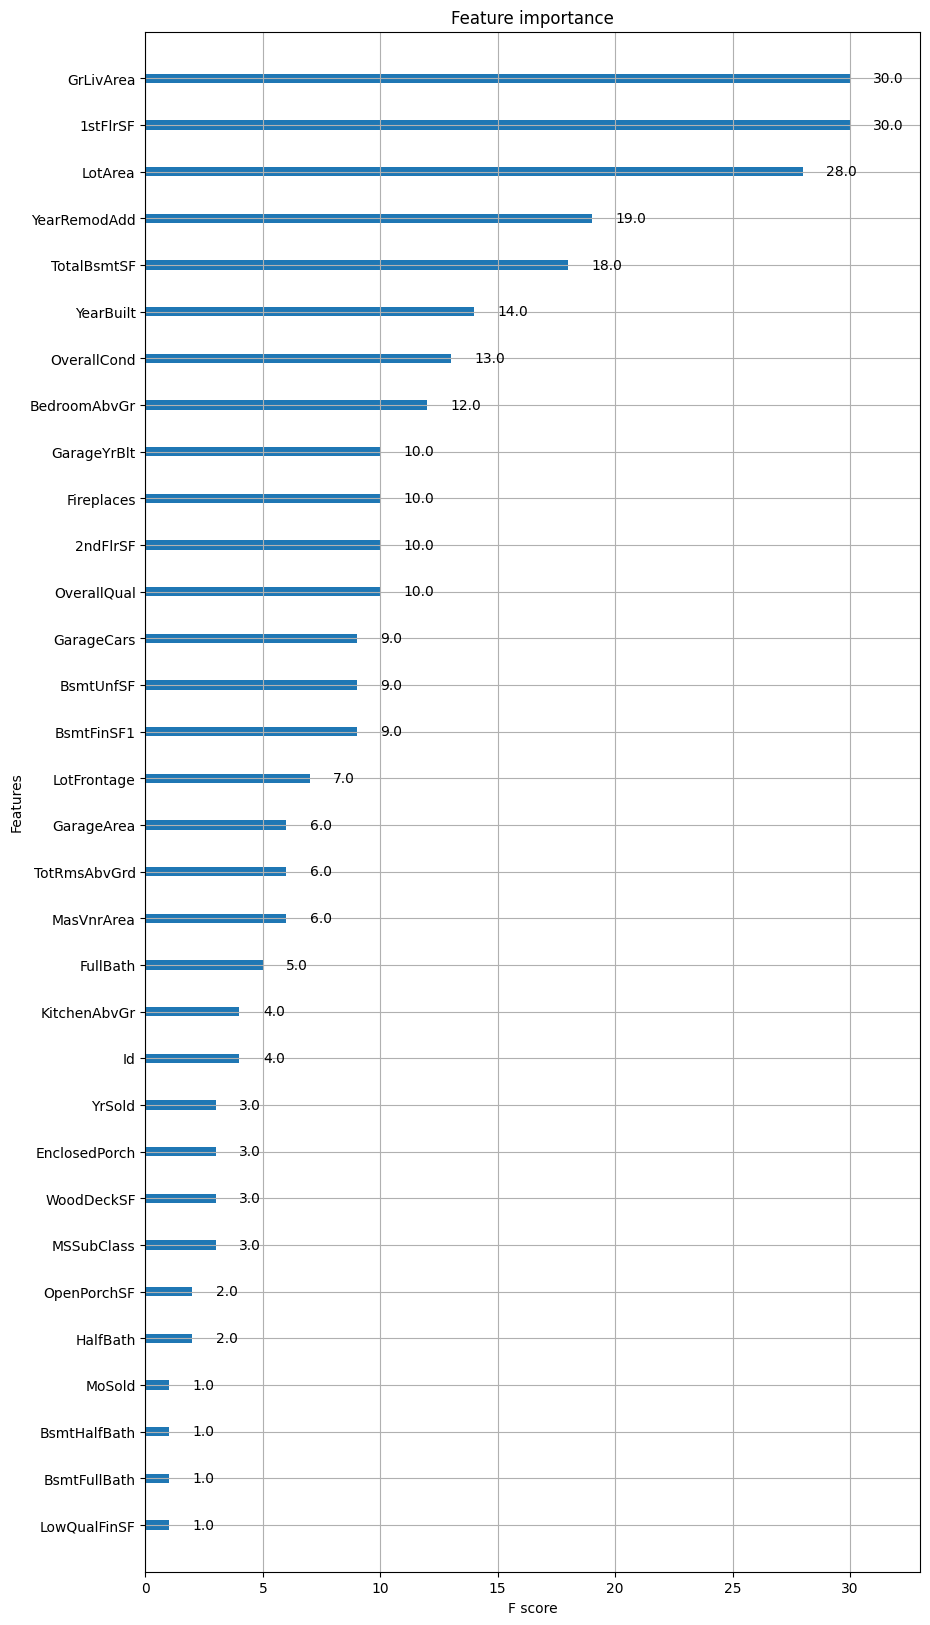

In [48]:
#Note: We can also use Explainable ML for this purpose, ex. SHAP model.

from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 20))
plot_importance(xg_reg, ax=ax)
plt.show()

### <font color='orange'>LGBM<font>

LightGBM is a gradient-based one-side sampling algorithm that uses leaf-wise (best-first) tree growth.
LightGBM can handle categorical features by taking the input of feature names.


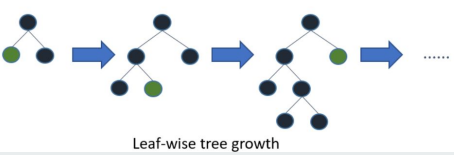

#### <font color='red'>Coding Example<font>

##### <font color='black'>Classification<font>

In [54]:
data = pd.read_csv('bill_authentication.csv')

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['Class'], test_size=0.2)

In [56]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier()
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

[LightGBM] [Info] Number of positive: 496, number of negative: 601
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1097, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.452142 -> initscore=-0.192019
[LightGBM] [Info] Start training from score -0.192019
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [57]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[158   3]
 [  0 114]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       161
           1       0.97      1.00      0.99       114

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



##### <font color='black'>Regression<font>

In [58]:
data = pd.read_csv('train.csv')

In [59]:
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

In [61]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [62]:
from lightgbm import LGBMRegressor

LGBM = LGBMRegressor(n_estimators = 1000)
LGBM.fit(X_train,Y_train)

y_pred = LGBM.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3088
[LightGBM] [Info] Number of data points in the train set: 1095, number of used features: 34
[LightGBM] [Info] Start training from score 180115.270320


/Users/ana/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [63]:
from sklearn.metrics import mean_absolute_error
import numpy as np

print("Mean Absolute Error: " + str(mean_absolute_error(y_pred, Y_test)))

Mean Absolute Error: 18928.54439432524


### <font color='pink'>Cat Boost<font>

CatBoost uses MVS(Minimal Variance Sampling). It grows balanced trees.
CatBoost can handle categorical feature values, as they are transformed to numeric values using the formula below.


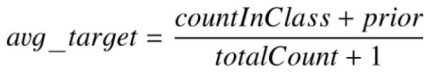

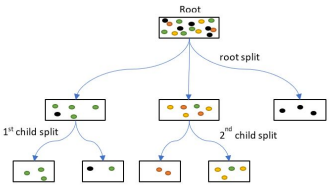

#### <font color='red'>Coding Example<font>

##### <font color='black'>Classification<font>

In [64]:
data = pd.read_csv('bill_authentication.csv')

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['Class'], test_size=0.2)

In [66]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 11.7 MB/s  0:00:02m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 11.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [catboost]2/3 [catboost]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [67]:
#Note: The ROC curve shows the model’s ability to distinguishing between classes. AUC is the Area Under the ROC Curve.

from catboost import CatBoostClassifier
from random import seed

cb_model= CatBoostClassifier(loss_function='Logloss',eval_metric='AUC',verbose=200,random_seed=seed(1))
cb_model.fit(X_train,Y_train)

Learning rate set to 0.010718
0:	total: 59.2ms	remaining: 59.1s
200:	total: 168ms	remaining: 667ms
400:	total: 262ms	remaining: 391ms
600:	total: 353ms	remaining: 235ms
800:	total: 444ms	remaining: 110ms
999:	total: 535ms	remaining: 0us


In [68]:
y_pred = cb_model.predict(X_test)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[155   0]
 [  0 120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       120

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



##### <font color='black'>Regression<font>

In [70]:
data = pd.read_csv('train.csv')

In [ ]:
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
#Note: Do we need to change seed?
#Note: metric_period

from catboost import CatBoostRegressor


cb_model = CatBoostRegressor(iterations=500,
                             learning_rate=0.05,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed=42,
                             bagging_temperature=0.2,
                             od_type='Iter',
                             metric_period=50,
                             od_wait=20)

cb_model.fit(X_train, Y_train)

0:	learn: 78432.0114339	total: 60.1ms	remaining: 30s
50:	learn: 27091.9399963	total: 2.21s	remaining: 19.5s
100:	learn: 17154.8988858	total: 5.99s	remaining: 23.7s
150:	learn: 13229.2364896	total: 8.15s	remaining: 18.8s
200:	learn: 10959.0072134	total: 10.2s	remaining: 15.2s
250:	learn: 8905.3678780	total: 13.2s	remaining: 13.1s
300:	learn: 7270.4139250	total: 15.3s	remaining: 10.1s
350:	learn: 5931.6308905	total: 20.4s	remaining: 8.66s
400:	learn: 4981.7909023	total: 25.1s	remaining: 6.2s
450:	learn: 4064.2007123	total: 29.5s	remaining: 3.21s
499:	learn: 3368.0317417	total: 35.8s	remaining: 0us


In [ ]:
y_pred = cb_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

print("Mean Absolute Error : " + str(mean_absolute_error(y_pred, Y_test)))

Mean Absolute Error : 16896.322994737446


### <font color='green'>Comparison: CatBoost vs XGBoost vs LGBM<font>

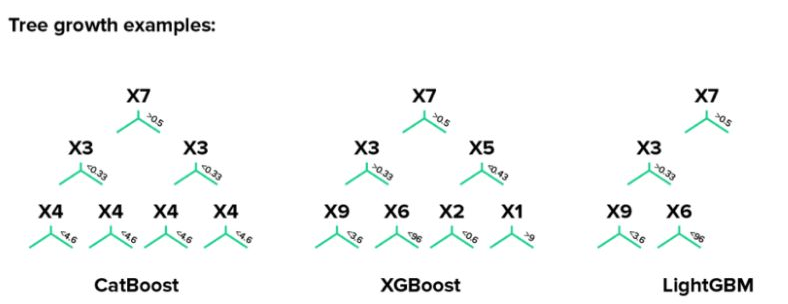

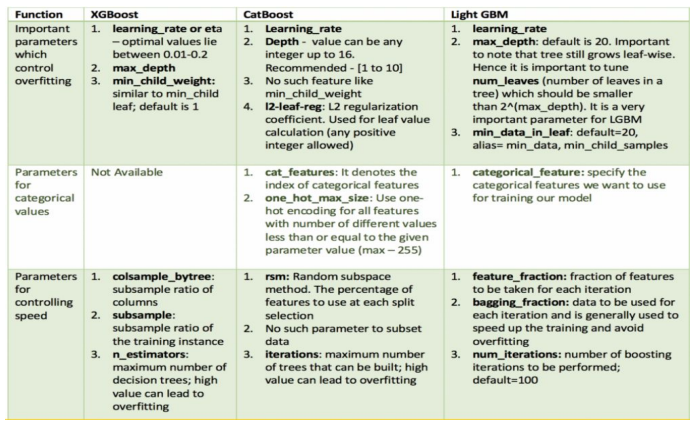

### <font color='orange'>Naive Bayes<font>

Naive Bayes is based on the Bayesian formula given below.

1. Calculate the prior probability for given
class labels
2. Find Likelihood probability with each
attribute for each class
3. Put these value in Bayes Formula and
calculate posterior probability.
4. See which class has a higher probability,
given the input belongs to the higher
probability class

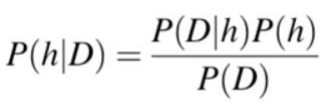

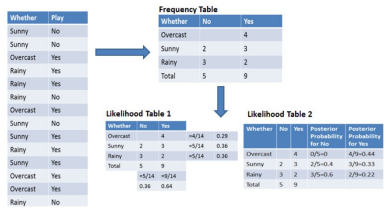

#### <font color='red'>Coding Example<font>

##### <font color='black'>Classification<font>

In [ ]:
data = pd.read_csv('bill_authentication.csv')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['Class'], test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,Y_train)

y_pred= model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[141  13]
 [ 27  94]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       154
           1       0.88      0.78      0.82       121

    accuracy                           0.85       275
   macro avg       0.86      0.85      0.85       275
weighted avg       0.86      0.85      0.85       275

